# Support Vector Machines
### Valeria Pérez Cong S 145009
### 24 de noviembre del 2017

Brief description (detail on slides): Plot decision boundary and margin for a linear svm. Compare the performace of an SVM to that of a Neural net for classifying points inside a circle



## Ejercicio 1: plot decision bounday and margin for a perceptron vs linear svm

In [7]:
import tensorflow as tf

import os
import io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scipy.stats import norm
from sklearn import preprocessing
from random import random
import math
from sklearn import datasets, linear_model

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

from pylab import *
from sklearn import svm


In [205]:
#importamos los datos para el ejercicio 2 y para el 1 al mismo tiempo

circle=pd.read_csv("/Users/valeriaperezcong/Desktop/ITAM/9/aprendizaje/udemy/DataScience-Python3/DeepLearning/circle_data.csv")
dec=pd.read_csv("/Users/valeriaperezcong/Desktop/ITAM/9/aprendizaje/udemy/DataScience-Python3/svm/andSVM_2.csv")


In [10]:
dec.describe()

,X1,X2,y
count,7.000000,7.000000,7.000000
mean,1.000000,0.857143,0.428571
std,1.154701,1.345185,0.534522
min,0.000000,-1.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000
75%,1.500000,1.500000,1.000000
max,3.000000,3.000000,1.000000


In [11]:
dec

,X1,X2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1
4,2,3,1
5,3,2,1
6,0,-1,0


In [180]:
X_and=np.asarray([[0,0],[0,1],[1,0],[1,1],[2,3],[3,2],[0,-1]])
Y_and=np.asarray([[0],[0],[0],[1],[1],[1],[0]])

## Entrenamos el perceptrón

In [171]:
input_size_and = 2 #x1 y x2
output_layer_size_and = 1 #y
hidden_nodes_and=4 #escogido aleatoriamente

input_data_and= tf.placeholder(tf.float32,[None, input_size_and])

target_and = tf.placeholder(tf.float32,[None, output_layer_size_and])

input_weights_and=tf.Variable(tf.random_uniform([input_size_and,hidden_nodes_and],-1,1),name="input_weights_and")

input_biases_and= tf.Variable(tf.zeros([hidden_nodes_and]),name="input_biases_and")

hidden_weights_and= tf.Variable(tf.random_uniform([hidden_nodes_and,output_layer_size_and],-1,1),name="hidden_weights_and")

hidden_biases_and=tf.Variable(tf.zeros([output_layer_size_and]),name="hidden_biases_and")


input_layer=tf.matmul(input_data_and,input_weights_and)
hidden_layer=tf.nn.sigmoid(input_layer+input_biases_and)


output_layer=tf.nn.sigmoid(tf.matmul(hidden_layer,hidden_weights_and)+hidden_biases_and)

loss_function=tf.reduce_mean(tf.reduce_sum((target_and-output_layer)**2))

optimizer_and = tf.train.GradientDescentOptimizer(0.001).minimize(loss_function)


#Evaluamos 
correct_prediction = tf.equal(tf.round(output_layer),target_and)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))



In [172]:
## corremos la red
init_and = tf.global_variables_initializer()
sess_and = tf.Session()

sess_and.run(init_and)
for a in range(20000):
    sess_and.run(optimizer_and, feed_dict={input_data_and: X_and, target_and: Y_and})

In [173]:
correct_prediction_and = tf.equal(tf.round(output_layer),target_and)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess_and.run(accuracy, feed_dict={input_data_and: X_and, target_and: Y_and})) 

1.0


Se puede observar que tenemos una accuracy del 100%

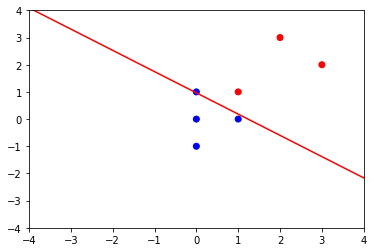

In [174]:
w=[sess_and.run(input_biases_and, feed_dict={input_data_and: X_and, target_and: Y_and})[0]]+[i[0] for i in sess_and.run(input_weights_and, feed_dict={ input_data_and: X_and, target_and: Y_and})]

m=((w[0]/w[2]))/((-w[0]/w[1])) 


#ploteamos x1 y x2 y los ponemos del color según su clasificación
plt.scatter(X_and[:,0],X_and[:,1],c=['red' if i==1 else 'blue' for i in Y_and])
x = np.linspace(-4,4,100)
plt.plot(x,-w[0]/w[2]+m*x,color='red')
plt.ylim([-4,4])
plt.xlim([-4,4])
plt.show()


In [175]:
w

[1.2734421, -1.0323941, -1.3198152]

## Usamos SVM con Kernel linear

### C=1

In [182]:
from sklearn import svm, datasets

X=np.asarray([dec["X1"],dec["X2"]]).T
Y=np.asarray(dec["y"])

C = 1.0 #error penalty term
svc = svm.SVC(kernel='linear', C=C).fit(X, Y) #donde X es la feature data
#y es la clasificacion

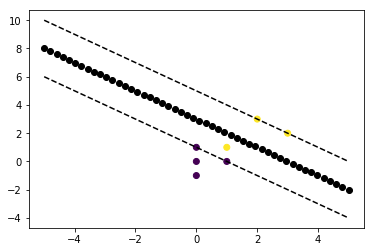

Error cuadrado medio: 14.2857142857 %


In [189]:

w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (svc.intercept_[0]) / w[1]
margin = 1 / np.sqrt(np.sum(svc.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.clf()
plt.plot(xx, yy, 'ko')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(X[:,0],X[:,1],c=Y)

plt.show()
e = np.mean((svc.predict(X)-Y)**2)*100
print("Error cuadrado medio:",e,"%")


In [190]:
C = 100 #error penalty term
svc_100 = svm.SVC(kernel='linear', C=C).fit(X, Y) #donde X es la feature data
#y es la clasificacion

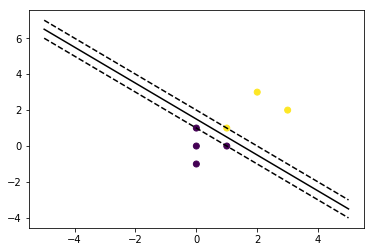

Error cuadrado medio: 0.0 %


In [192]:
w = svc_100.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (svc_100.intercept_[0]) / w[1]
margin = 1 / np.sqrt(np.sum(svc_100.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.clf()
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(X[:,0],X[:,1],c=Y)

plt.show()
e = np.mean((svc_100.predict(X)-Y)**2)*100
print("Error cuadrado medio:",e,"%")


Con el valor de C=100, se puede observar que los support vectors sí sirven como fronteras y para ayudar a delimitar el hiperplano. 

## Ejercicio 2: problema del círculo con NN y SVM

In [193]:
col_x= circle.ix[:,0]
col_y=circle.ix[:,1]
target=circle.ix[:,2]

In [194]:
X=[]
Y=[]

for i in range (0,1500):
    X.append([col_x[i],col_y[i]])

for j in range (0,1500):
    Y.append([target[j]])
    
X=np.asarray(X)
Y=np.asarray(Y)

In [195]:
input_size = 2
output_layer_size = 1

input_data= tf.placeholder(tf.float32,[None, input_size])

target = tf.placeholder(tf.float32,[None, output_layer_size])

hidden_nodes=4
#hold weights and biases between each training run 
#2,2


input_weights=tf.Variable(tf.random_uniform([input_size,hidden_nodes],-1,1),name="input_weights")

input_biases= tf.Variable(tf.random_uniform([hidden_nodes]),name="input_biases")



hidden_weights= tf.Variable(tf.random_uniform([hidden_nodes,output_layer_size],-1,1),name="hidden_weights")

hidden_biases=tf.Variable(tf.random_uniform([output_layer_size]),name="hidden_biases")

input_layer=tf.matmul(input_data,input_weights)
hidden_layer=tf.nn.sigmoid(input_layer+input_biases)



output_layer=tf.nn.sigmoid(tf.matmul(hidden_layer,hidden_weights)+hidden_biases)

loss_function=tf.reduce_mean(tf.reduce_sum((target-output_layer)**2))

optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(loss_function)


In [196]:
##corremos la red
init=tf.global_variables_initializer()
sess=tf.Session()

train_steps=[]
errores=[]
input_biases_array=[] 
hidden_biases_array=[] 

input_weights_array=[] 
hidden_weights_array=[]

#corremos 5000 training steps
sess.run(init)
for i in range(5000):
    train, error, input_w, hidden_w, input_b,hidden_b = sess.run([optimizer, loss_function, input_weights, hidden_weights, input_biases, hidden_biases], feed_dict={input_data: X, target: Y})
    errores.append(error)
    train_steps.append(train)
    hidden_biases_array.append(hidden_b)
    

In [197]:
correct_prediction = tf.equal(tf.round(output_layer),target)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={input_data: X, target: Y})) 

0.996


Se puede observar que la red tuvo una accuracy del 99.6% 

### Datos originales

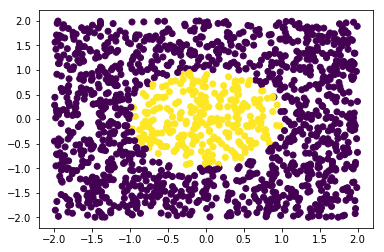

In [199]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

### Clasificación según la red

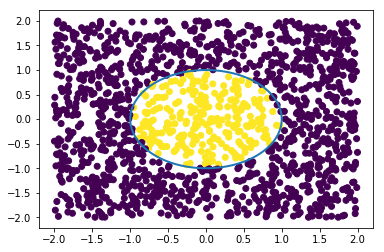

In [203]:
x2 = np.linspace(-2,2,100)
Y2 = sess.run(tf.round(output_layer), feed_dict={input_data: X, target: Y})
plt.scatter(X[:,0],X[:,1],c=Y2)
circulo_puntos = np.linspace(0,2*3.1416,100) 
plt.plot(np.sin(circulo_puntos),np.cos(circulo_puntos), linewidth=2)
plt.show()

### SVM

In [209]:
X=np.asarray([circle["x"],circle["y"]]).T
Y=np.asarray(circle["target"])

## no intenté el kernel lineal porque no creo que un circulo 
#se pueda dividir con un hiperplano lineal
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.fit(X, Y.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

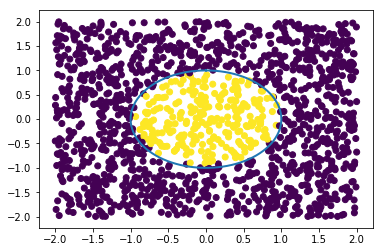

In [210]:
plt.plot(np.sin(circulo_puntos),np.cos(circulo_puntos), linewidth=2)
y_svm = rbf_svc.predict(X)
plt.scatter(X[:,0],X[:,1],c=y_svm)
plt.show()